<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1VGgesA7mir_mmdS6WidOflg1Y-49_fI7" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **Operaciones entre imágenes**

Empezamos definiendo una función para subir imágenes.

In [4]:
from google.colab import files
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
import cv2
import numpy as np

import os

def subir_imagen():
    # Pedir al usuario que seleccione un archivo
    uploaded = files.upload()

    # Obtener el nombre del archivo y su contenido
    file_name = next(iter(uploaded))
    file_content = uploaded[file_name]

    # Definir el directorio donde se almacenará el archivo
    target_dir = '/content/imagenes'
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Almacenar el archivo en el directorio especificado
    file_path = os.path.join(target_dir, file_name)
    with open(file_path, 'wb') as f:
        f.write(file_content)

    return file_path

Subimos una ..

In [5]:
ruta1 = subir_imagen()
img1 = cv2.imread(ruta1).astype(np.float32)


Saving Captura de pantalla de 2018-11-12 21-01-49.png to Captura de pantalla de 2018-11-12 21-01-49 (2).png


Subimos otra ..

In [16]:
ruta2 = subir_imagen()
img2 = cv2.resize(cv2.imread(ruta2), (img1.shape[1], img1.shape[0])).astype(np.float32)


Saving ProhibitionSign2.svg.png to ProhibitionSign2.svg.png


Ahora leemos las dos imágenes y procuramos que sean de mismo tamaño.

También las reduciremos guardando la proporción alto/ancho.

In [17]:
def resize_image(image, max_width=500):
    h, w = image.shape[:2]
    aspect_ratio = h / w

    if w > max_width:
        new_width = max_width
        new_height = int(new_width * aspect_ratio)
        resized_image = cv2.resize(image, (new_width, new_height))
        return resized_image
    else:
        return image

def show_with_text(image, text):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, text, (10, 40), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2_imshow(image)

# Redimensionar las imágenes
img1 = resize_image(img1)
img2 = resize_image(img2)

# Asegurarse de que las imágenes tengan las mismas dimensiones
if img1.shape[0] > img2.shape[0]:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
elif img1.shape[0] < img2.shape[0]:
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# Ahora img1 e img2 tienen el mismo tamaño y puedes proceder con las operaciones


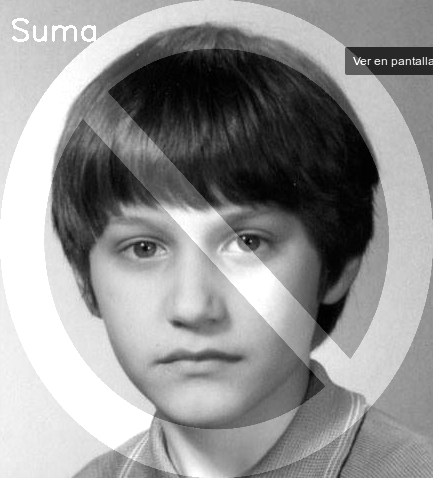

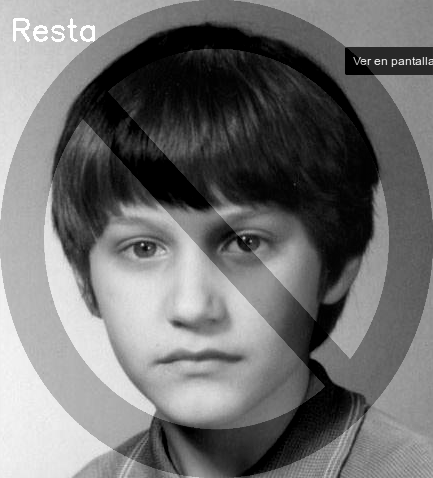

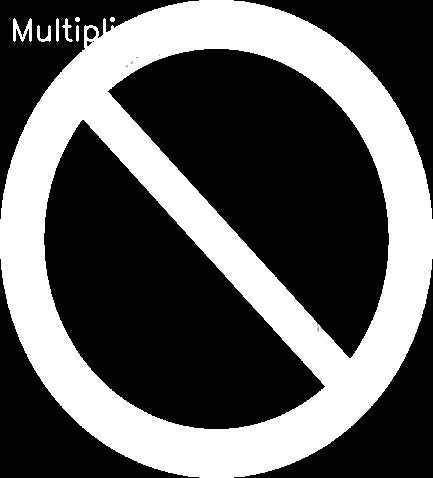

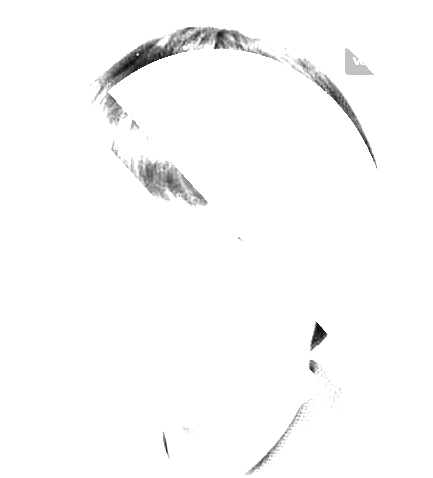

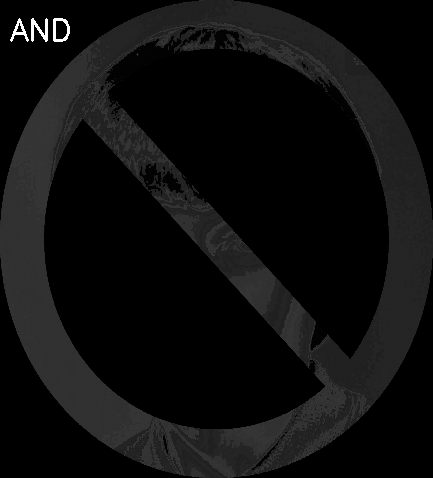

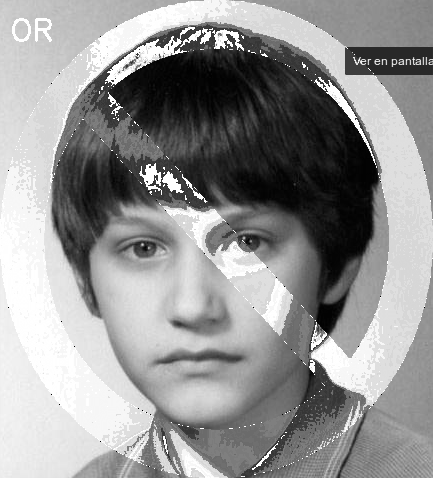

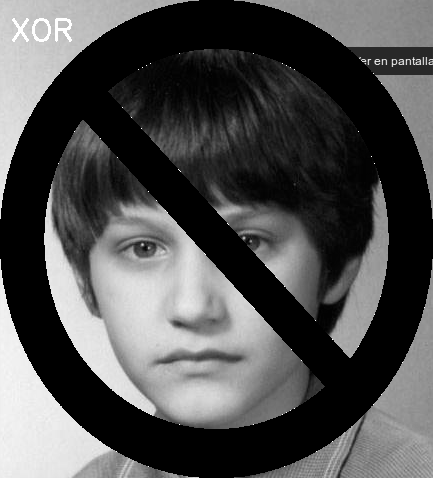

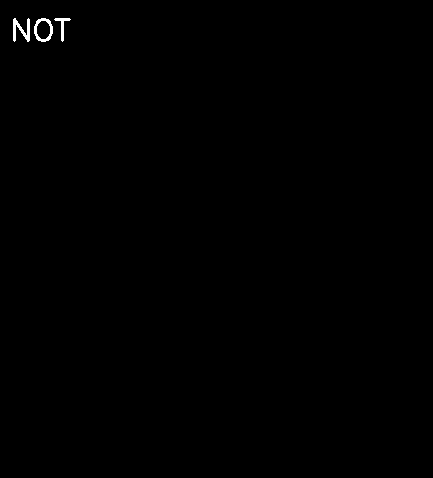

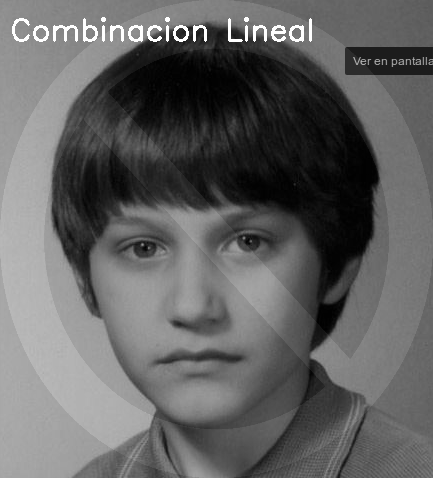

In [18]:
# Convertir a escala de grises
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Suma de imágenes
img_sum = cv2.add(img1, img2)
show_with_text(img_sum, 'Suma')

# Resta de imágenes
img_subtract = cv2.subtract(img1, img2)
show_with_text(img_subtract, 'Resta')

# Multiplicación de imágenes
img_multiply = cv2.multiply(img1, img2)
show_with_text(img_multiply, 'Multiplicacion')

# División de imágenes
img_divide = cv2.divide(img1, img2.astype(np.float32)) * 255
show_with_text(img_divide, 'Division')

# Operaciones lógicas (AND, OR, XOR, NOT)
img_and = cv2.bitwise_and(img1, img2)
show_with_text(img_and, 'AND')

img_or = cv2.bitwise_or(img1, img2)
show_with_text(img_or, 'OR')

img_xor = cv2.bitwise_xor(img1, img2)
show_with_text(img_xor, 'XOR')

img_not = cv2.bitwise_not(img1)
show_with_text(img_not, 'NOT')

# Combinación lineal (alfa*img1 + beta*img2 + gamma)
img_linear_comb = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
show_with_text(img_linear_comb, 'Combinacion Lineal')



# Convolución de un *kernel* sobre una imagen.


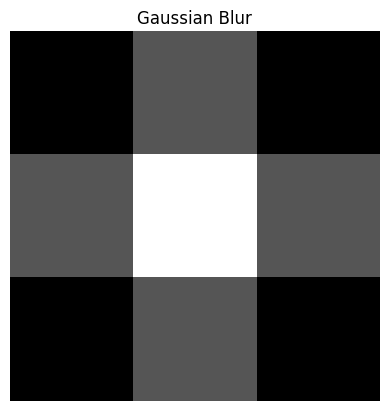

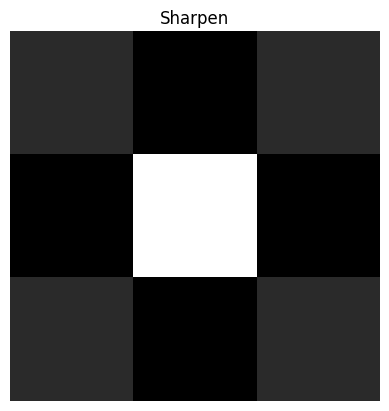

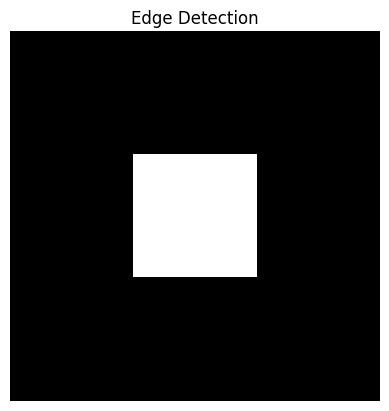

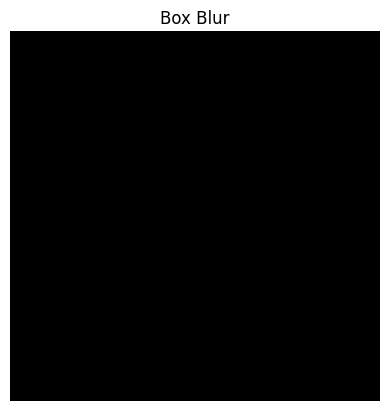

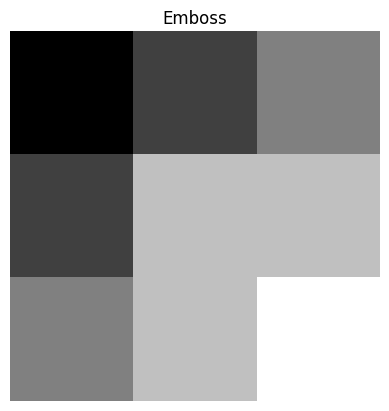

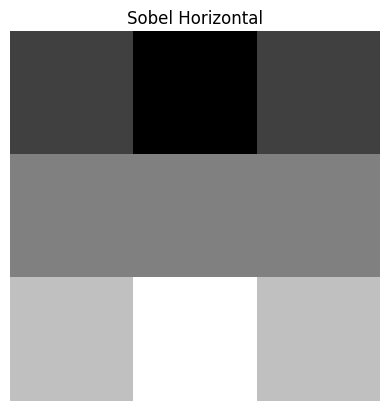

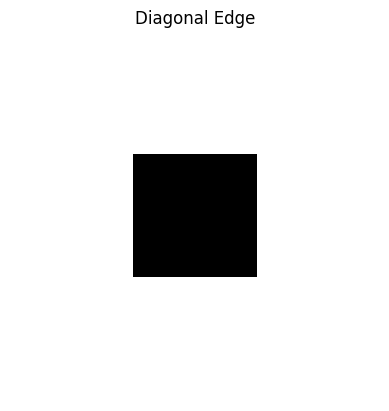

In [8]:
# Definimos varios kernels
kernels = {
    'Gaussian Blur': np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0,
    'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    'Edge Detection': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    'Box Blur': np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0,
    'Emboss': np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    'Sobel Horizontal': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'Diagonal Edge': np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]])
}

# Mostrarr cada kernel
for name, kernel in kernels.items():
    filtered_img = cv2.filter2D(img1, -1, kernel)

    plt.imshow(kernel, cmap="gray")
    plt.title(name)
    plt.axis('off')
    plt.show()

In [15]:
# Mostrar la imagen original
cv2_imshow(img1)

# Aplicar cada kernel y mostrar los resultados
for name, kernel in kernels.items():
    filtered_img = cv2.filter2D(img1, -1, kernel)

    filtered_img = cv2.convertScaleAbs(filtered_img, alpha=1.5, beta=0)

    filtered_img = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    #plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    plt.imshow(filtered_img, cmap='gray')

    plt.title(name)
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.